In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
features=pd.read_csv('Features data set.csv')
sales=pd.read_csv('sales data-set.csv')
stores=pd.read_csv('stores data-set.csv')


In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
features['Date']=pd.to_datetime(features['Date'])
sales['Date']=pd.to_datetime(sales['Date'])

In [7]:
print('***********')
print('*Features:*')
print('***********')

print('Shape:',features.shape)
print('\nNullValues:\n\n',features.isnull().sum())
print('\nFeatures Column:\n',features.columns)
print('\n_________________________________________________________________________________\n')
print('***********')
print('* Sales:  *')
print('***********')
print('Shape:',sales.shape)
print('\nNullValues:\n\n',sales.isnull().sum())
print('\nFeatures Column:\n',sales.columns)

***********
*Features:*
***********
Shape: (8190, 12)

NullValues:

 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Features Column:
 Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

_________________________________________________________________________________

***********
* Sales:  *
***********
Shape: (421570, 5)

NullValues:

 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Features Column:
 Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [8]:
df=pd.merge(sales,features,on=['Store','Date','IsHoliday'],how='left')
df=pd.merge(df,stores,on=['Store'],how='left')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [9]:
types_encoded,types=df['Type'].factorize()
df['Type']=types_encoded
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,151315


In [10]:
print('Duplicate Datas:',df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate Datas: 0


In [11]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [12]:
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'Column_type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T).rename(index={0: 'null values'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/len(df)).T).rename(index={0:'null values %'})
tab_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Column_type,int64,int64,datetime64[ns],float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
null values,0,0,0,0,0,0,0,270889,310322,284479,286603,270138,0,0,0,0
null values %,0,0,0,0,0,0,0,0.642572,0.73611,0.674808,0.679847,0.64079,0,0,0,0


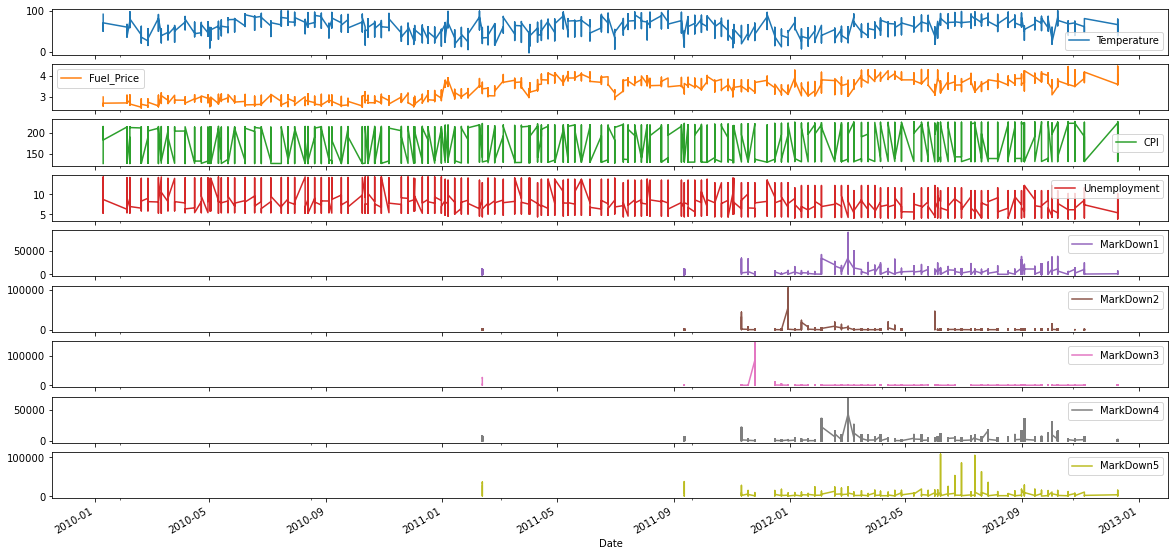

In [13]:
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date',subplots=True,
                                                                          figsize=(20,10))
pl.show()

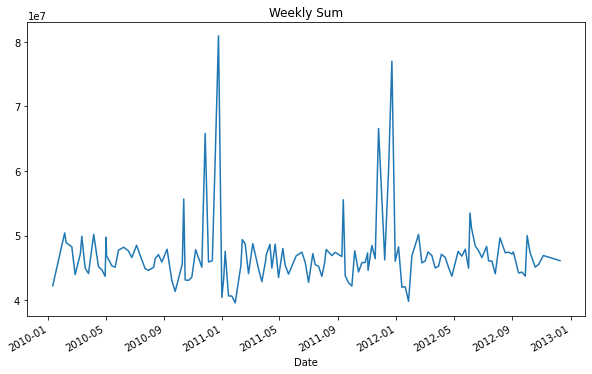

In [14]:
pl.title('Weekly Sum')
df.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(10,6))
pl.show()

In [15]:
np.unique(df['Type'],return_counts=True)

(array([0, 1, 2], dtype=int64), array([215478, 163495,  42597], dtype=int64))

In [16]:
print('This is giving as a DataFrame')
df.groupby('Date',as_index=False)['Weekly_Sales'].sum().head()


This is giving as a DataFrame


,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13


In [22]:
x = np.array([[[0], [1], [2]]])
np.squeeze(x),np.ravel(x)

(array([0, 1, 2]), array([0, 1, 2]))